In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "Geo-referenced Annual Crop Yields - Raw Data.csv"


In [2]:
try:

    data = pd.read_csv(file_path, comment='#')

except Exception as e:

    data, e = None, str(e)



data


,longitude,latitude,crop_flow_lb_s,datetime,duration,distance_in,swth_wdth_in,moisture,status,pass_num,serial_number,field,dataset,product,elevation_ft
0,-85.372824,42.408276,3.29,2013-07-24 19:20:04+00,1,56.0,180.0,6.6,0.0,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.5
1,-85.372838,42.408288,2.89,2013-07-24 19:20:03+00,1,47.0,180.0,6.6,0.0,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.5
2,-85.372847,42.408296,2.89,2013-07-24 19:20:02+00,1,38.0,180.0,6.6,0.0,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.5
3,-85.372855,42.408301,3.69,2013-07-24 19:20:01+00,1,18.0,180.0,6.6,0.0,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.5
4,-85.372855,42.408304,3.39,2013-07-24 19:20:00+00,1,39.0,180.0,6.6,0.0,141,5648,F1: Lysimeter,L1:,Wheat (Sft Rd Wtr),953.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767821,-85.375763,42.408524,0.00,1996-10-29 00:12:17+00,1,9.0,90.0,5.0,33.0,1,960462,F32: T4R6,L1: EAST66,Corn,660.3
767822,-85.375763,42.408520,0.00,1996-10-29 00:12:14+00,1,3.0,90.0,5.0,33.0,1,960462,F32: T4R6,L1: EAST66,Corn,660.6
767823,-85.375771,42.408520,0.00,1996-10-29 00:12:09+00,1,9.0,90.0,5.0,33.0,1,960462,F32: T4R6,L1: EAST66,Corn,660.6
767824,-85.375771,42.408524,0.00,1996-10-29 00:12:08+00,1,9.0,90.0,5.0,33.0,1,960462,F32: T4R6,L1: EAST66,Corn,660.9


In [3]:
data.shape


(767826, 15)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767826 entries, 0 to 767825
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   longitude       767826 non-null  float64
 1   latitude        767826 non-null  float64
 2   crop_flow_lb_s  767826 non-null  float64
 3   datetime        767826 non-null  object 
 4   duration        767826 non-null  int64  
 5   distance_in     767826 non-null  float64
 6   swth_wdth_in    767826 non-null  float64
 7   moisture        767826 non-null  float64
 8   status          738576 non-null  float64
 9   pass_num        767826 non-null  int64  
 10  serial_number   767826 non-null  int64  
 11  field           767826 non-null  object 
 12  dataset         767826 non-null  object 
 13  product         767826 non-null  object 
 14  elevation_ft    767826 non-null  float64
dtypes: float64(8), int64(3), object(4)
memory usage: 87.9+ MB


In [5]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767826 entries, 0 to 767825
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   longitude       767826 non-null  float64            
 1   latitude        767826 non-null  float64            
 2   crop_flow_lb_s  767826 non-null  float64            
 3   datetime        767826 non-null  datetime64[ns, UTC]
 4   duration        767826 non-null  int64              
 5   distance_in     767826 non-null  float64            
 6   swth_wdth_in    767826 non-null  float64            
 7   moisture        767826 non-null  float64            
 8   status          738576 non-null  float64            
 9   pass_num        767826 non-null  int64              
 10  serial_number   767826 non-null  int64              
 11  field           767826 non-null  object             
 12  dataset         767826 non-null  object             
 13  product       

In [7]:
data['year'] = data['datetime'].dt.strftime('%Y')
print(data['year'])

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
767821    1996
767822    1996
767823    1996
767824    1996
767825    1996
Name: year, Length: 767826, dtype: object


In [8]:
corn_data = data[data['product'] == 'Corn']
corn_description =corn_data.describe()

print(corn_description)

           longitude       latitude  crop_flow_lb_s      duration   \
count  280955.000000  280955.000000   280955.000000  280955.000000   
mean      -85.371101      42.410626        5.390639       1.000082   
std         0.002410       0.002392        4.464920       0.010159   
min       -85.377441      42.405907        0.000000       1.000000   
25%       -85.372047      42.408550        2.410000       1.000000   
50%       -85.370627      42.410568        3.820000       1.000000   
75%       -85.369240      42.412582        6.944000       1.000000   
max       -85.367946      42.415356       25.060000       3.000000   

         distance_in   swth_wdth_in       moisture         status  \
count  280955.000000  280955.000000  280955.000000  280955.000000   
mean       59.630940     121.459664      14.243437      14.050706   
std        16.043169      43.326861       6.848054      15.807843   
min         0.000000      30.000000      -4.600000       0.000000   
25%        51.000000    

In [9]:
wheat_data = data[data['product'].str.contains('wheat', case = False)]
wheat_data_description = wheat_data.describe()
print(wheat_data_description)

           longitude       latitude  crop_flow_lb_s      duration   \
count  234494.000000  234494.000000   234494.000000  234494.000000   
mean      -85.371396      42.410398        4.317149       1.000013   
std         0.002502       0.002429        2.558949       0.003577   
min       -85.377475      42.403039        0.000000       1.000000   
25%       -85.372774      42.408352        2.400000       1.000000   
50%       -85.370892      42.410053        3.800000       1.000000   
75%       -85.369346      42.412411        6.090000       1.000000   
max       -85.367924      42.415355       48.740000       2.000000   

         distance_in   swth_wdth_in       moisture         status  \
count  234494.000000  234494.000000  234494.000000  205244.000000   
mean       67.584912     173.280903      13.255623       6.537058   
std        20.816970      17.843520       4.554238      12.390518   
min         0.000000      12.000000       0.000000       0.000000   
25%        55.000000    

In [10]:
soy_data = data[data['product'].str.contains('soy', case=False)]
soy_description = soy_data.describe()
print(soy_description)

           longitude       latitude  crop_flow_lb_s      duration   \
count  232082.000000  232082.000000   232082.000000  232082.000000   
mean      -85.371244      42.410442        2.876366       1.000039   
std         0.002450       0.002435        1.565446       0.006227   
min       -85.377495      42.403019        0.000000       1.000000   
25%       -85.372284      42.408372        1.900000       1.000000   
50%       -85.370763      42.410210        2.760000       1.000000   
75%       -85.369309      42.412458        3.690000       1.000000   
max       -85.367943      42.415367       15.580000       2.000000   

         distance_in   swth_wdth_in       moisture         status  \
count  232082.000000  232082.000000  232082.000000  232082.000000   
mean       71.319133     163.256349      17.641621      12.400729   
std        17.972074      26.176193       9.778394      15.494454   
min         0.000000      12.000000       0.000000       0.000000   
25%        63.000000    

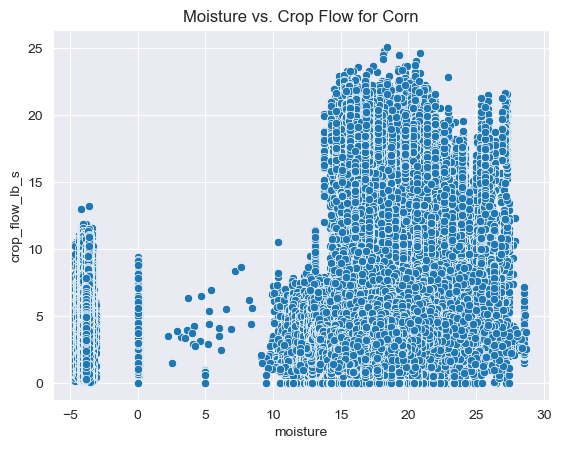

In [11]:


sns.scatterplot(x='moisture', y='crop_flow_lb_s', data=corn_data)
plt.title('Moisture vs. Crop Flow for Corn')
plt.show()




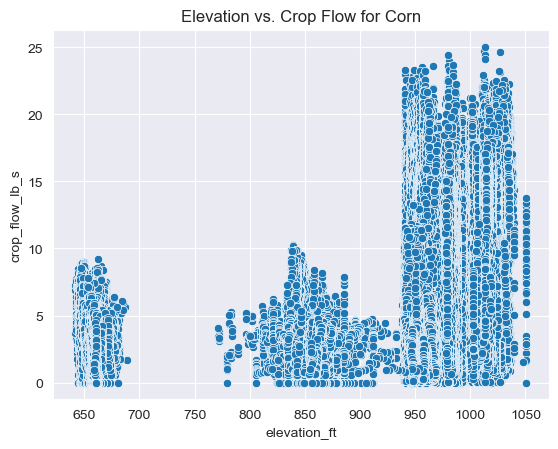

In [12]:
sns.scatterplot(x='elevation_ft', y='crop_flow_lb_s', data=corn_data)
plt.title('Elevation vs. Crop Flow for Corn')
plt.show()

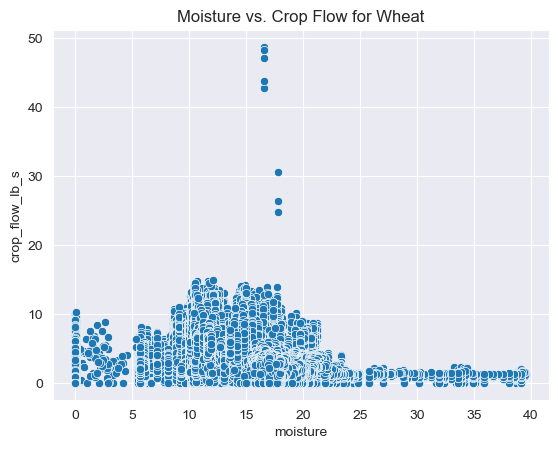

In [13]:
sns.scatterplot(x='moisture', y='crop_flow_lb_s', data=wheat_data)
plt.title('Moisture vs. Crop Flow for Wheat')
plt.show()

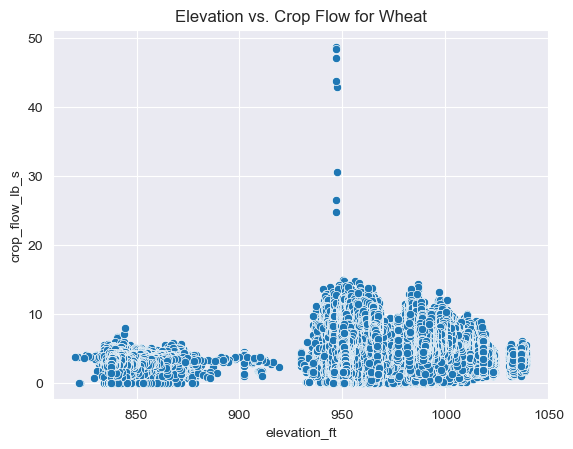

In [14]:
sns.scatterplot(x='elevation_ft', y='crop_flow_lb_s', data=wheat_data)
plt.title('Elevation vs. Crop Flow for Wheat')
plt.show()

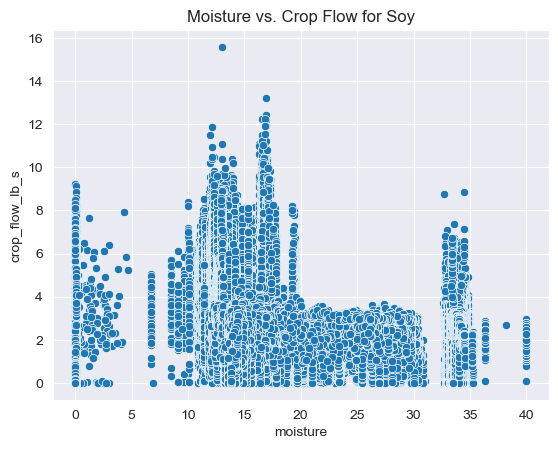

In [15]:

sns.scatterplot(x='moisture', y='crop_flow_lb_s', data=soy_data)
plt.title('Moisture vs. Crop Flow for Soy')
plt.show()

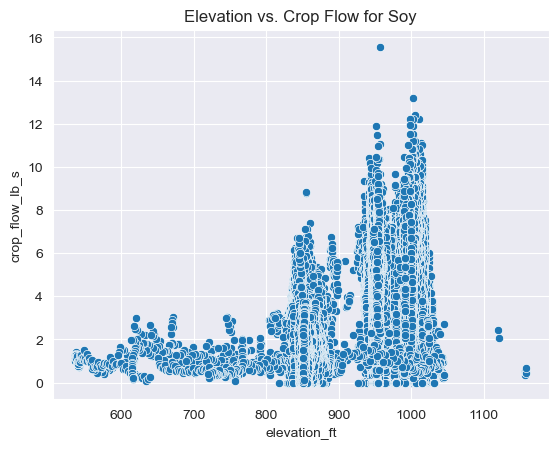

In [16]:
sns.scatterplot(x='elevation_ft', y='crop_flow_lb_s', data=soy_data)
plt.title('Elevation vs. Crop Flow for Soy')
plt.show()

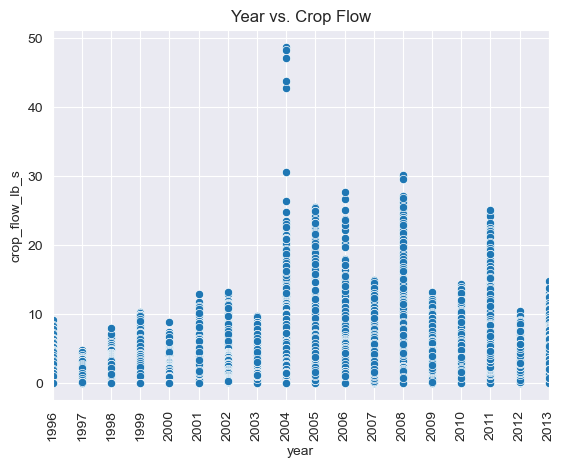

In [20]:
sns.scatterplot(x='year', y='crop_flow_lb_s', data=data)
plt.title('Year vs. Crop Flow')
plt.xticks(rotation=90)
plt.xlim(min(data['year']), max(data['year']))
plt.show()